In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

In [3]:
os.chdir('..')
print(os.getcwd())
from tmp.get_metrics import append_laps

/home/gianni/Files/Studium/Master/04_FS2023/MT/f1tenth_development_gym


In [4]:
# Functions
def calculate_moving_average(data, window_width):
    cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
    ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
    return ma_vec

# Gather data

In [5]:
base_path = './SI_Toolkit_ASF/Experiments/0_DNN/Models'
model = 'Dense-10IN-64H1-128H2-64H3-8OUT-0-1'

In [6]:
log_cl_path = f'{base_path}/{model}/log_training.csv'
log_cl = pd.read_csv(log_cl_path, sep=';')
log_cl = log_cl.set_index('step')
# log_cl

In [7]:
glob.glob(f'{base_path}/{model}/F1TENTH_*.csv')[0]

'./SI_Toolkit_ASF/Experiments/0_DNN/Models/Dense-10IN-64H1-128H2-64H3-8OUT-0-1/F1TENTH_Blank-MPPI-1__2023-09-22_14-40-17.csv'

In [8]:
recording_cl_path = glob.glob(f'{base_path}/{model}/F1TENTH_*.csv')[0]
recording_cl = pd.read_csv(recording_cl_path, skiprows=8)
recording_cl.index = (recording_cl.time / 0.04).astype(int)
recording_cl.index.names = ['step']
# recording_cl

In [9]:
df = recording_cl.join(log_cl, how='inner')
df = append_laps(df)
df

,time,translational_control_applied,angular_control_applied,translational_control,angular_control,pose_x,pose_y,pose_theta,linear_vel_x,linear_vel_y,...,WYPT_REL_Y_10,WYPT_REL_Y_11,WYPT_REL_Y_12,WYPT_REL_Y_13,WYPT_REL_Y_14,mu,epoch,loss,lr,lap
step,,,,,,,,,,,,,,,,,,,,,
3,0.12,4.74117,0.22828,4.74117,0.22828,0.04235,0.80010,0.00986,0.90100,0.0,...,-0.0757,-0.1153,-0.1551,-0.1946,-0.2327,0.9,0,0.003202,0.00001,0
3,0.12,4.74117,0.22828,4.74117,0.22828,0.04235,0.80010,0.00986,0.90100,0.0,...,-0.0757,-0.1153,-0.1551,-0.1946,-0.2327,0.9,0,0.003202,0.00001,0
4,0.16,4.74629,0.18187,4.74629,0.18187,0.08377,0.80121,0.02772,1.26140,0.0,...,-0.1565,-0.2031,-0.2501,-0.2966,-0.3419,0.9,0,0.003535,0.00001,0
5,0.20,4.72971,0.11601,4.72971,0.11601,0.13940,0.80622,0.04927,1.62180,0.0,...,-0.2554,-0.3105,-0.3660,-0.4211,-0.4749,0.9,0,0.000105,0.00001,0
6,0.24,4.73168,0.03029,4.73168,0.03029,0.20917,0.81468,0.07880,1.98220,0.0,...,-0.3888,-0.4556,-0.5228,-0.5895,-0.6549,0.9,0,0.004212,0.00001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32310,1292.40,3.95676,-0.00415,3.95676,-0.00415,7.46970,0.42378,-0.07582,4.06427,0.0,...,-1.0770,-1.3954,-1.7589,-2.1507,-2.5486,0.9,0,0.000708,0.00001,94
32311,1292.44,3.88481,-0.12627,3.88481,-0.12627,7.63035,0.40827,-0.00253,3.98678,0.0,...,-1.6854,-2.0596,-2.4558,-2.8514,-3.2271,0.9,0,0.003412,0.00001,94
32312,1292.48,3.77838,-0.12914,3.77838,-0.12914,7.78851,0.40046,0.05137,3.91328,0.0,...,-1.8794,-2.2603,-2.6584,-3.0509,-3.4189,0.9,0,0.000703,0.00001,94


# Loss evolution

## DNN

In [10]:
# plt.plot(calculate_moving_average(log_cl.loss, 1000))
# plt.xlabel('Training step')
# plt.ylabel('Loss []')

<AxesSubplot:xlabel='Lap []', ylabel='Mean Loss []'>

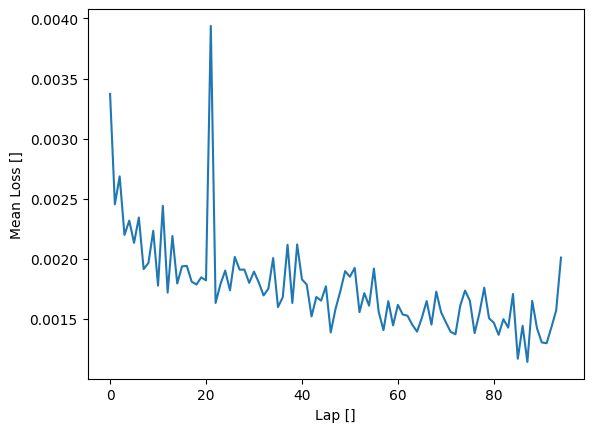

In [11]:
df_agg = df.groupby('lap').mean()
df_agg.plot(y='loss', xlabel='Lap []', ylabel='Mean Loss []', legend=False)

In [12]:
df_agg

,time,translational_control_applied,angular_control_applied,translational_control,angular_control,pose_x,pose_y,pose_theta,linear_vel_x,linear_vel_y,...,WYPT_REL_Y_09,WYPT_REL_Y_10,WYPT_REL_Y_11,WYPT_REL_Y_12,WYPT_REL_Y_13,WYPT_REL_Y_14,mu,epoch,loss,lr
lap,,,,,,,,,,,,,,,,,,,,,
0,7.086006,3.239817,-0.071251,3.239817,-0.071251,2.303746,-2.393422,-0.230061,3.081881,0.0,...,-1.207486,-1.395126,-1.585221,-1.775481,-1.964917,-2.151283,0.9,0.0,0.003372,0.00001
1,20.972565,3.204190,-0.075392,3.204190,-0.075392,2.348006,-2.453390,-0.088364,3.129116,0.0,...,-1.230385,-1.421920,-1.615245,-1.808564,-2.000141,-2.188795,0.9,0.0,0.002453,0.00001
2,34.713429,3.211143,-0.071789,3.211143,-0.071789,2.312592,-2.431876,-0.164942,3.136641,0.0,...,-1.218568,-1.410393,-1.604656,-1.799134,-1.993009,-2.184059,0.9,0.0,0.002686,0.00001
3,48.437225,3.212834,-0.074352,3.212834,-0.074352,2.341608,-2.439774,-0.078458,3.137429,0.0,...,-1.222333,-1.412995,-1.605463,-1.797748,-1.988332,-2.176383,0.9,0.0,0.002198,0.00001
4,62.159544,3.222753,-0.075711,3.222753,-0.075711,2.329217,-2.434716,-0.202637,3.147657,0.0,...,-1.218537,-1.409348,-1.601700,-1.793975,-1.985048,-2.174077,0.9,0.0,0.002317,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1242.840000,3.215715,-0.072388,3.215715,-0.072388,2.339262,-2.446132,-0.240435,3.140017,0.0,...,-1.210432,-1.400392,-1.592227,-1.784463,-1.975545,-2.163977,0.9,0.0,0.001303,0.00001
91,1256.580000,3.211537,-0.075507,3.211537,-0.075507,2.287410,-2.462981,-0.267979,3.137979,0.0,...,-1.232652,-1.423625,-1.616858,-1.809722,-2.001782,-2.190993,0.9,0.0,0.001296,0.00001
92,1270.320000,3.219497,-0.072933,3.219497,-0.072933,2.344884,-2.436212,-0.113725,3.143129,0.0,...,-1.221865,-1.412112,-1.604408,-1.797214,-1.988734,-2.177548,0.9,0.0,0.001428,0.00001


# Metrics on different datasets

Here we want to get the MSE on horizon after every lap, evaluated on all six datasets.

In [ ]:
# Load a given model --> How to do this? get_net requires ckpt files to be within the model folder and there is no possibility to change the path to it. 
#   Could I just add this?
